<a href="https://colab.research.google.com/github/Harun-nurah/POLIO-KENYA/blob/main/KenyaPolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

load pre-existing code data set

In [46]:
import seaborn as sns
from scipy.spatial import cKDTree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2


load pre-existing KENYA csv file data sets

In [69]:
POL_dataset = pd.read_csv('https://github.com/Harun-nurah/POLIO-KENYA/raw/main/KENYA_DATA_4.csv')

display loaded csv file

In [70]:
POL_dataset.head()

,Lat,Long,osm_id,completene,amenity,changeset_timestamp,name,changeset_,uuid,Unnamed: 9
0,37.258345,-0.621432,9806303647,21.875,pharmacy,2022/06/09 12:28:16+00,Murrihs pharmacy,122163766,e34a05e2e285408ea1a9d7eeb5e5fd55,NaN
1,36.351495,0.039231,9810337113,9.375,hospital,2020/04/29 07:31:18+00,o,122239334,df0388cbdff44e4d81c4434192577662,NaN
2,34.771462,-0.676845,8187913519,15.625,pharmacy,2022/06/11 08:27:28+00,Shivling,113752869,dcb23539aa28494ea9a1ce1775dbf842,NaN
3,34.848227,-0.370388,8659509434,12.500,hospital,2021/11/14 07:09:04+00,Free Clinic,103494274,d7df3725429b4b668b17dd56b0f4afc2,NaN
4,36.876300,-1.309770,8894604390,12.500,pharmacy,2021/04/23 16:14:41+00,Duka la dawa,107429931,ffad7ee4c4ec40ec95a98323f594b278,NaN


load Kenya shape file

In [71]:
shapefile = gpd.read_file("https://github.com/Harun-nurah/POLIO-KENYA/raw/main/Kenya_Counties.shp")

plot loaded shape file with excel points

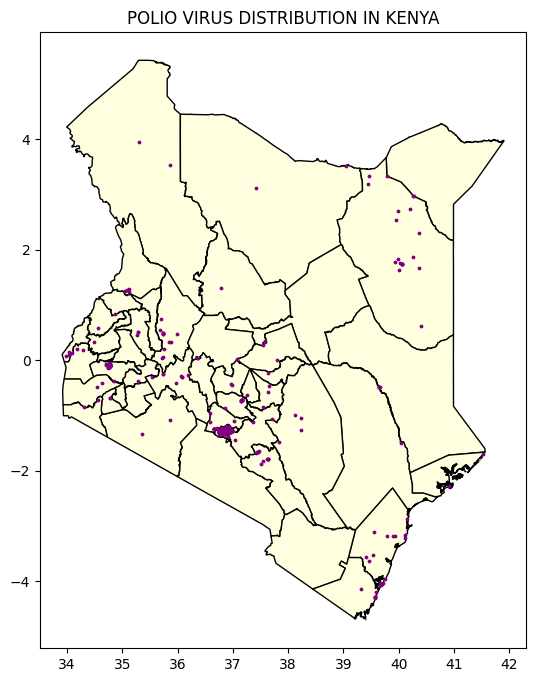

In [72]:
shapefile.plot(color='lightyellow', edgecolor='black', figsize=(10, 8))
x = POL_dataset['Lat']
y = POL_dataset['Long']
plt.title("POLIO VIRUS DISTRIBUTION IN KENYA")
plt.scatter(x, y, color='purple', s=3, alpha=1)

conduct kernell density and plot spatial density map

<ipython-input-59-f870b96ea5d0>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap="icefire", shade=True, bw_adjust=0.5)


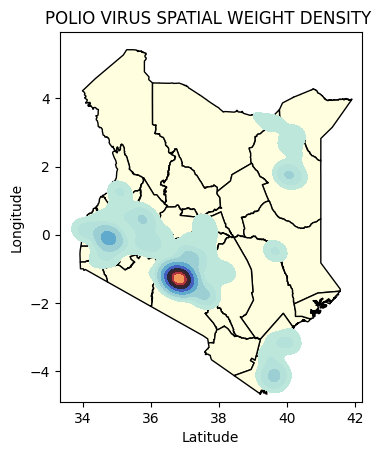

In [59]:
x = POL_dataset['Lat']
y = POL_dataset['Long']

shapefile.plot(color='lightyellow', edgecolor='black')

#kernel density plo
sns.kdeplot(x=x, y=y, cmap="icefire", shade=True, bw_adjust=0.5)
plt.title("POLIO VIRUS SPATIAL WEIGHT DENSITY ")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

From KDE, regions where the estimated density is high represent areas where the data points are densely concentrated. This means that in those regions, the probability of finding a data point is high according to the estimated distribution.

Nearest neighbours distance and analysis showing: Euclidian distances
                                                  Analysis Map
                                                  Histogram

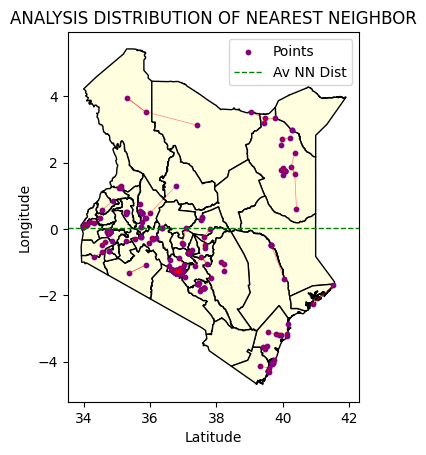

The Average Nearest Neighbor Distance For the Polio Dataset =  0.044678681139685


In [62]:
tree = cKDTree(np.column_stack((x, y))) #euclidean distance
distances, indices = tree.query(tree.data, k=2)#nearest neighbor distances

average_nn_distance1=distances[:, 1]
average_nn_distance = np.mean(distances[:, 1])#average

shapefile.plot(color='lightyellow', edgecolor='black')# shapefile

# Plot points
plt.scatter(x, y, color='purple', label='Points', s=10)
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.plot([xi, x[indices[i][1]]], [yi, y[indices[i][1]]], color='red', alpha=0.5, linewidth=0.5)

# Plot average
plt.axhline(average_nn_distance, color='green', linestyle='dashed', linewidth=1, label='Av NN Dist')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('ANALYSIS DISTRIBUTION OF NEAREST NEIGHBOR')
plt.legend()
plt.show()

print("The Average Nearest Neighbor Distance For the Polio Dataset = ", average_nn_distance)



By examining the distribution of nearest neighbor distances, you can gain insights into the spatial structure of the dataset.
the distribution is skewed or exhibits long tails, it may suggest spatial heterogeneity or spatial processes influencing the distribution of polio

histogram plotting

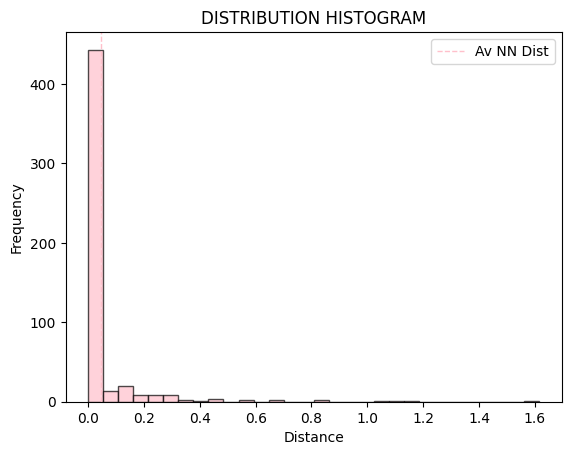

In [61]:
#histogram
plt.hist(average_nn_distance1, bins=30, color='pink', edgecolor='black', alpha=0.7)
plt.axvline(average_nn_distance, color='pink', linestyle='dashed', linewidth=1)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('DISTRIBUTION HISTOGRAM')
plt.legend(['Av NN Dist'])
plt.show()

Skewed Distribution:histogram has a long tail on one side and relatively high bars on the other side which may indicate a skewed distribution. That is, the left tail is longer and there are low bars on the right side, it suggests a left-skewed distribution, indicating that the majority of values are clustered on the lower end with a few high outliers.

Standard deviation elipse

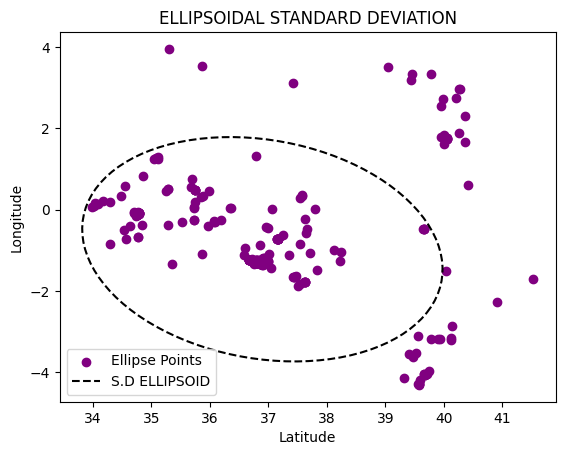

In [63]:
mean_x = np.mean(x)
mean_y = np.mean(y)#mean

cov_matrix = np.cov(x, y)#covariance matrix

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)#  eigenvalues and eigenvectors

theta = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])#angle of rotation

std_dev_major = np.sqrt(chi2.ppf(0.95, 2)) * np.sqrt(eigenvalues[0])
std_dev_minor = np.sqrt(chi2.ppf(0.95, 2)) * np.sqrt(eigenvalues[1])#standard deviations

#points on the ellipse
t = np.linspace(0, 2 * np.pi, 100)
ellipse_x = mean_x + std_dev_major * np.cos(t) * np.cos(theta) - std_dev_minor * np.sin(t) * np.sin(theta)
ellipse_y = mean_y + std_dev_major * np.cos(t) * np.sin(theta) + std_dev_minor * np.sin(t) * np.cos(theta)

# Plot the points and the ellipse
plt.scatter(x, y, color='purple', label='Ellipse Points')
plt.plot(ellipse_x, ellipse_y, color='black', linestyle='dashed', label='S.D ELLIPSOID')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('ELLIPSOIDAL STANDARD DEVIATION')
plt.legend()
plt.show()


Data points lying outside the ellipse may be considered outliers or anomalies, depending on the context of the analysis.
Conversely, clusters or groups of data points that fall within or close to the ellipse may indicate patterns, relationships, or homogeneous subsets within the data.

The Mean centre point

Mean Center points:
Latitude: 36.897966838050195
Longitude: -0.97231930411583


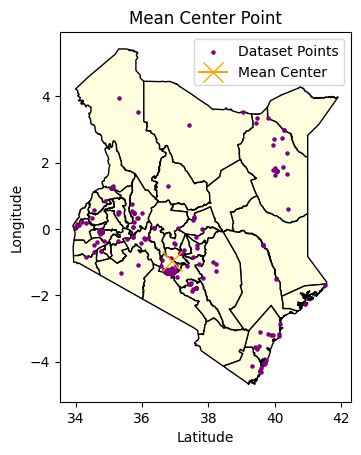

In [64]:

mean_x = np.mean(x)
mean_y = np.mean(y)#mean center

print("Mean Center points:")
print("Latitude:", mean_x)
print("Longitude:", mean_y)

mean_center = gpd.GeoDataFrame(geometry=gpd.points_from_xy([mean_x], [mean_y]), crs="EPSG:4326")#GeoDataFrame

shapefile.plot(color='lightyellow', edgecolor='black')

plt.scatter(x, y, color='purple', label='Dataset Points', s=5)

# Plot the mean center
plt.plot(mean_x, mean_y, marker='x', color='orange', markersize=15, label='Mean Center')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Mean Center Point')
plt.legend()
plt.show()

By examining the mean center relative to the overall spatial distribution of the points, you can gain insights into the spatial pattern or arrangement of the data.
The mean center is offset from the center of the study area or clustered toward one side, it indicates a spatial bias or clustering in the data.

Temporal distribution histogram

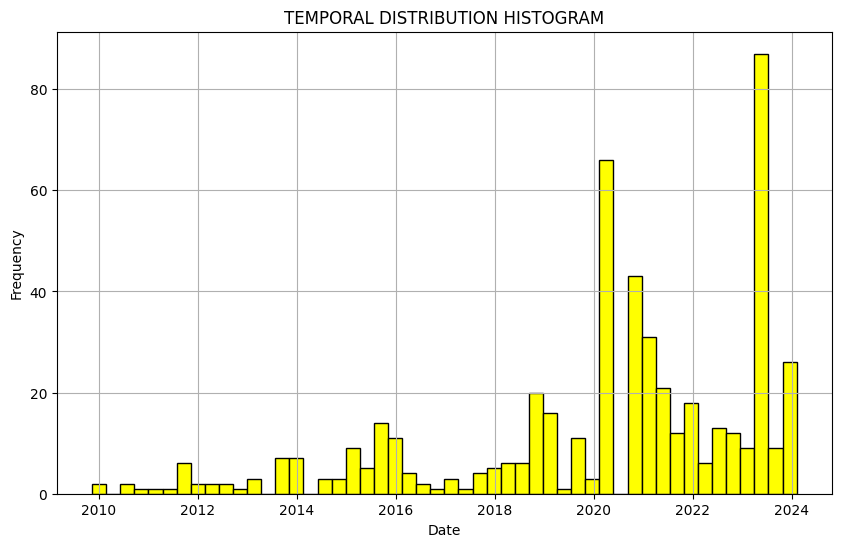

In [68]:

POL_dataset['changeset_timestamp'] = pd.to_datetime(POL_dataset['changeset_timestamp'], errors='coerce')#date to time type

# Plot temporal distribution histogram
plt.figure(figsize=(10, 6))
POL_dataset['changeset_timestamp'].hist(bins=50, color='yellow', edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('TEMPORAL DISTRIBUTION HISTOGRAM')
plt.show()


A taller bar indicates a higher frequency of events during that time period, while a shorter bar indicates a lower frequency
Polio outbreak is increasing rapidly over time
Peaks or spikes in the histogram may indicate periods of increased activity, events, or occurrences causing polio outbreak